In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
path ='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

First let's look at the numeric data only

In [6]:
df = df._get_numeric_data()
df.head()

Unnamed: 0  Unnamed: 0.1  symboling  normalized-losses  wheel-base  \
0           0             0          3                122        88.6   
1           1             1          3                122        88.6   
2           2             2          1                122        94.5   
3           3             3          2                164        99.8   
4           4             4          2                164        99.4   

     length     width  height  curb-weight  engine-size  ...  stroke  \
0  0.811148  0.890278    48.8         2548          130  ...    2.68   
1  0.811148  0.890278    48.8         2548          130  ...    2.68   
2  0.822681  0.909722    52.4         2823          152  ...    3.47   
3  0.848630  0.919444    54.3         2337          109  ...    3.40   
4  0.848630  0.922222    54.3         2824          136  ...    3.40   

   compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg    price  \
0                9.0       111.0    5000.0        21           27  13495.0   
1                9.0       111.0    5000.0        21           27  16500.0   
2                9.0       154.0    5000.0        19           26  16500.0   
3               10.0       102.0    5500.0        24           30  13950.0   
4                8.0       115.0    5500.0        18           22  17450.0   

   city-L/100km  diesel  gas  
0     11.190476       0    1  
1     11.190476       0    1  
2     12.368421       0    1  
3      9.791667       0    1  
4     13.055556       0    1  

[5 rows x 21 columns]

In [7]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\shbnd\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [8]:
def distribution_plot(function_1, function_2, name_1, name_2, Title):
    plt.figure(figsize=(12,10))
    sns.distplot(function_1,hist=False,color='r',label=name_1)
    sns.distplot(function_2,hist=False,color='b',label=name_2)
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

In [51]:
def PollyPlot(xtrain, xtest, ytrain, ytest, L, poly_transform):
    plt.figure(figsize=(12,10)) 
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x = np.arange(xmin,xmax)
    plt.plot(xtrain,ytrain,'ro',label='Training Data')
    plt.plot(xtest,ytest,'bo',label='Testing Data')
    plt.plot(x, L.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

#### Training and Testing 

In [9]:
y_data = df['price']
x_data = df.drop('price',axis=1)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.15,random_state=1)
print(x_train.shape[0])
print(x_test.shape[0])

170
31


In [12]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size=0.4, random_state=1)
print(x_train_1.shape[0])
print(x_test_1.shape[0])

120
81


In [16]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()
L.fit(x_train[['horsepower']],y_train)
print('R squared on Test',L.score(x_test[['horsepower']],y_test))
print('R squared on Train',L.score(x_train[['horsepower']],y_train))

R squared on Test 0.707688374146705
R squared on Train 0.6449517437659684


In [19]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_data, y_data, test_size=0.1, random_state=12)
L = LinearRegression()
L.fit(x_train_2[['horsepower']],y_train_2)
L.score(x_test[['horsepower']],y_test)

0.7132291556795614

#### Cross-validation Score 

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
Rcross = cross_val_score(L, x_data[['horsepower']],y_data,cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [22]:
print('The mean of the folds are',Rcross.mean())
print('The standard deviation of the folds are',Rcross.std())

The mean of the folds are 0.522009915042119
The standard deviation of the folds are 0.2911839444756029


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'. 

In [24]:
-1 * cross_val_score(L ,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

In [25]:
Rcross_1 = cross_val_score(L, x_data[['horsepower']], y_data, cv=2)
print('The mean',Rcross_1.mean())

The mean 0.5166761697127429


In [30]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(L, x_data[['horsepower']],y_data,cv=4)
yhat[:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

#### Overfitting, Underfitting and Model Selection 

In [31]:
features = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']
L = LinearRegression()
L.fit(x_train[features],y_train)
yhat_train = L.predict(x_train[features])
yhat_test = L.predict(x_test[features])

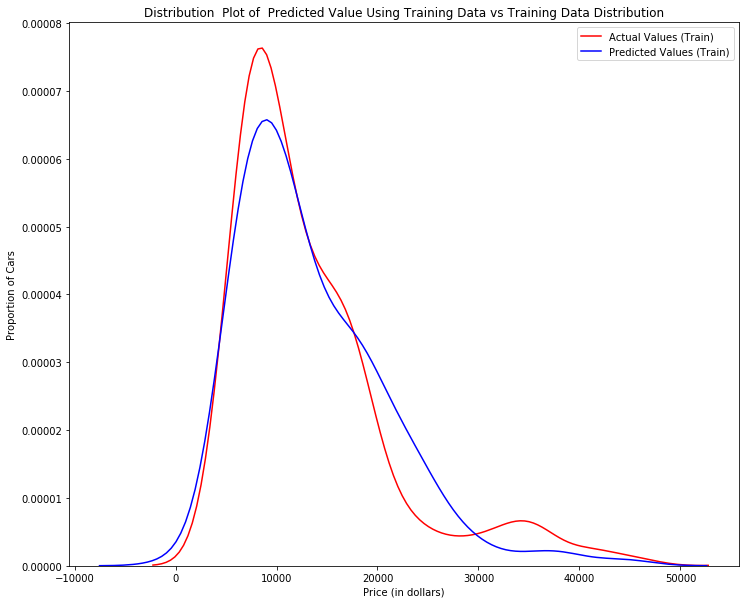

In [37]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
distribution_plot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

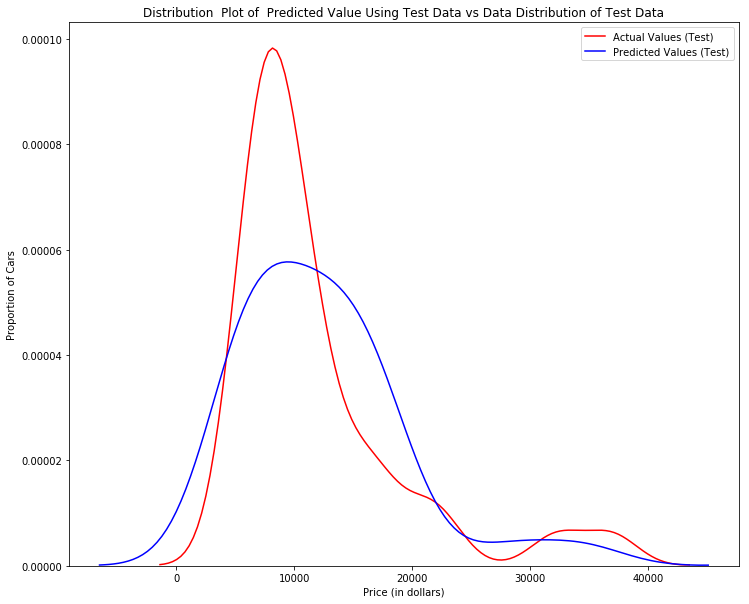

In [39]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
distribution_plot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [42]:
P = PolynomialFeatures(degree=5)
x_train_p = P.fit_transform(x_train[['horsepower']])
x_test_p = P.fit_transform(x_test[['horsepower']])

In [43]:
L = LinearRegression()
L.fit(x_train_p, y_train)
yhat = L.predict(x_test_p)

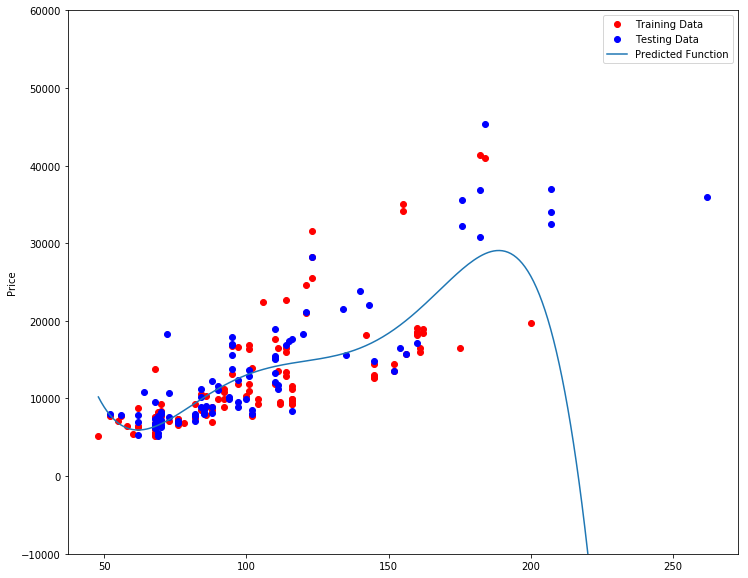

In [52]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, L, P)

In [54]:
L.score(x_train_p,y_train)

0.5567716899817778

In [55]:
L.score(x_test_p,y_test)

-29.871838229908324

A negative R squared value is indication of overfitting 

Text(3, 0.75, 'Maximum R^2 ')

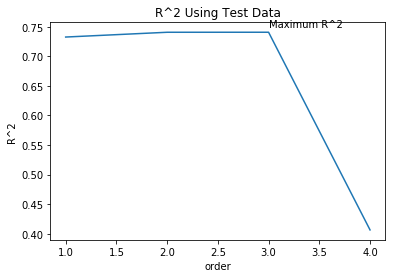

In [60]:
R_test = []
order = [i for i in range(1,5)]
for n in order:
    P = PolynomialFeatures(degree=n)
    x_train_pr = P.fit_transform(x_train[['horsepower']])
    x_test_pr = P.fit_transform(x_test[['horsepower']])    
    L.fit(x_train_pr, y_train)
    R_test.append(L.score(x_test_pr, y_test))
plt.plot(order, R_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    